In [9]:
%pip install pydot
%pip install networkx 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [3]:
dataset = pd.read_csv("./dataset/merged_csv/cleaned_merged_heart_dataset.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1


In [11]:
# Define features and target variable
X = dataset.drop('target', axis=1)  # Replace 'target' with your actual target column name
y = dataset['target']  # Replace 'target' with your actual target column name

# Impute missing values in features using the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the Neural Network classifier
model2 = MLPClassifier(
    hidden_layer_sizes=(10, 20, 10),  # Number of neurons in each hidden layer
    activation='relu',          # Activation function ('identity', 'logistic', 'tanh', 'relu')
    solver='adam',              # Optimization algorithm ('lbfgs', 'sgd', 'adam')
    alpha=0.0001,               # L2 penalty (regularization term) parameter
    batch_size='auto',          # Size of minibatches for stochastic optimizers
    learning_rate='constant',   # Learning rate schedule ('constant', 'invscaling', 'adaptive')
    learning_rate_init=0.001,   # Initial learning rate
    max_iter=300,               # Maximum number of iterations (epochs)
    random_state=42,            # Random state for reproducibility
    tol=1e-4,                   # Tolerance for stopping criteria
    verbose=False,              # Verbosity (can set to True for detailed logging)
    early_stopping=False,       # Whether to use early stopping to terminate training
    validation_fraction=0.1,    # Proportion of training data to set aside as validation set for early stopping
    n_iter_no_change=10         # Number of iterations with no improvement to wait before stopping
)

# Train the model
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Model Accuracy: {accuracy * 100:.2f}%")

Neural Network Model Accuracy: 71.85%


c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sarwi\.conda\envs\W

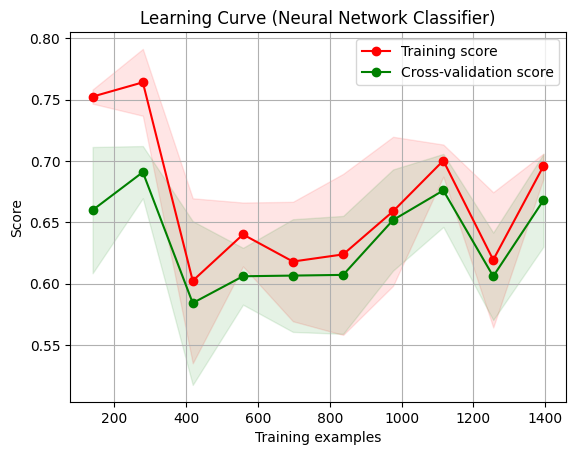

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model2, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve (Neural Network Classifier)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the average training and testing score
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


NetworkXError: Node 'Hidden_1_1' has no position.

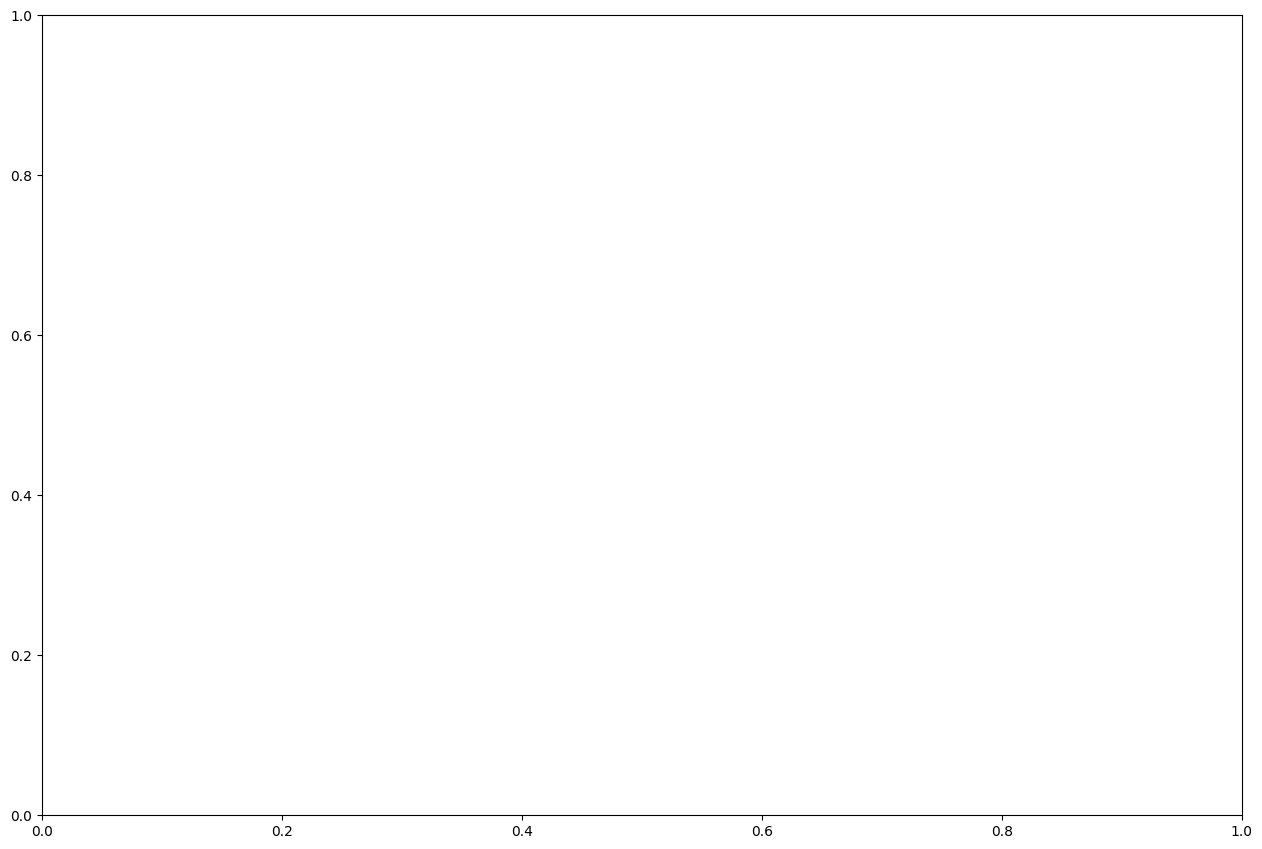

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define the layers
input_layer = ["Input_" + str(i) for i in range(1, X_train.shape[1] + 1)]
hidden_layer = ["Hidden_" + str(i) for i in range(1, 101)]  # 100 neurons in the hidden layer
output_layer = ["Output"]

# Add nodes for each layer
G.add_nodes_from(input_layer, layer='input')
G.add_nodes_from(hidden_layer, layer='hidden')
G.add_nodes_from(output_layer, layer='output')

# Add edges (connections between layers)
for i in input_layer:
    for j in hidden_layer:
        G.add_edge(i, j)
        
for j in hidden_layer:
    for k in output_layer:
        G.add_edge(j, k)

# Define positions for each layer
pos = {}
pos.update((node, (0, i)) for i, node in enumerate(input_layer))  # Input nodes
pos.update((node, (1, i)) for i, node in enumerate(hidden_layer))  # Hidden nodes
pos.update((node, (2, len(hidden_layer)//2)) for node in output_layer)  # Output node

# Draw the network
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold', arrows=True)
plt.title("Neural Network Structure")
plt.show()